In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

%matplotlib notebook

# Load Experimental Data

In [31]:
data = np.load('./tau_vs_n.npz')
n = data['n']
tau = data['tau']
std = data['std']
gamma = 1e3/tau

In [41]:
tau

array([ 12.37510185,  12.35859226,  12.2115586 ])

# Load Theoretical Data

In [32]:
data = np.load('./spe_vs_n.npz')
assert np.array_equal(data['n'], n), ValueError('Theoretical and experimental n need to be the same')
spe = data['spe']

# Decay Rates

In [33]:
xdata = n
ydata = gamma
yerr = std

<IPython.core.display.Javascript object>


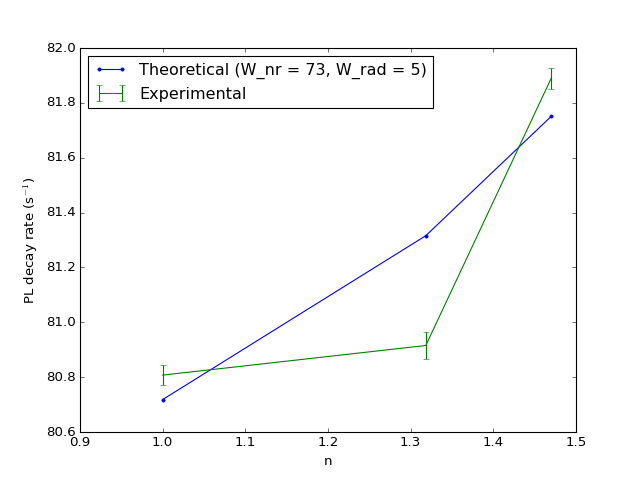

Quantum efficiency is 6.43 %


In [35]:
# REF: http://scipy-cookbook.readthedocs.io/items/FittingData.html
#
# Model for the observed decay rate in terms of non-radiative, radiative
# and average purcell factor (fp) over layer.
#
#  W_tot = W_nr + W_rad * fp(n)
#

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [40, 40]
out = optimize.leastsq(errfunc, pinit, args=(fp, ydata, yerr), full_output=1)

pfinal = out[0]
covar = out[1]

W_nr = pfinal[0]
W_rad = pfinal[1]

f, ax = plt.subplots()
ax.plot(n, fitfunc(pfinal, fp), '.-', label='Theoretical (W_nr = {0:.2g}, W_rad = {1:.2g})'.format(W_nr, W_rad))
ax.errorbar(xdata, ydata, yerr=yerr, label='Experimental')
ax.set_xlabel('n')
ax.set_ylabel('PL decay rate (s$^{-1}$)')
plt.legend(loc='best')

# Calculate QE from fitted params
QE = lambda W_rad, W_nr: W_rad / (W_rad + W_nr)
print('Quantum efficiency is {:.2f} %'.format(100*QE(W_rad, W_nr)))

In [36]:
1/5

0.2